<a href="https://colab.research.google.com/github/donkimc/titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic: Machine learning <P>
Data from https://www.kaggle.com/c/titanic/data <P>
Source code reference: <P>
https://youtu.be/fS70iptz-XU <P>
https://www.codementor.io/@innat_2k14/titanic-kaggle-machine-learning-from-disaster-part-1-10gbvqzguc

In [7]:
#Upload Files train.csv, test.csv
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [8]:
ls

sample_data/  test.csv  train.csv


In [0]:
#Read files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.shape

(891, 12)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


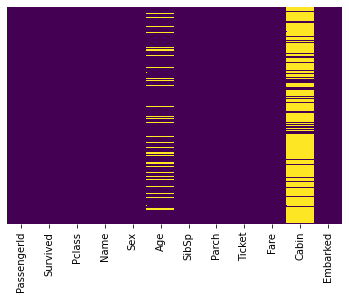

In [0]:
sns.heatmap(train.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

0    0.616162
1    0.383838
Name: Survived, dtype: float64

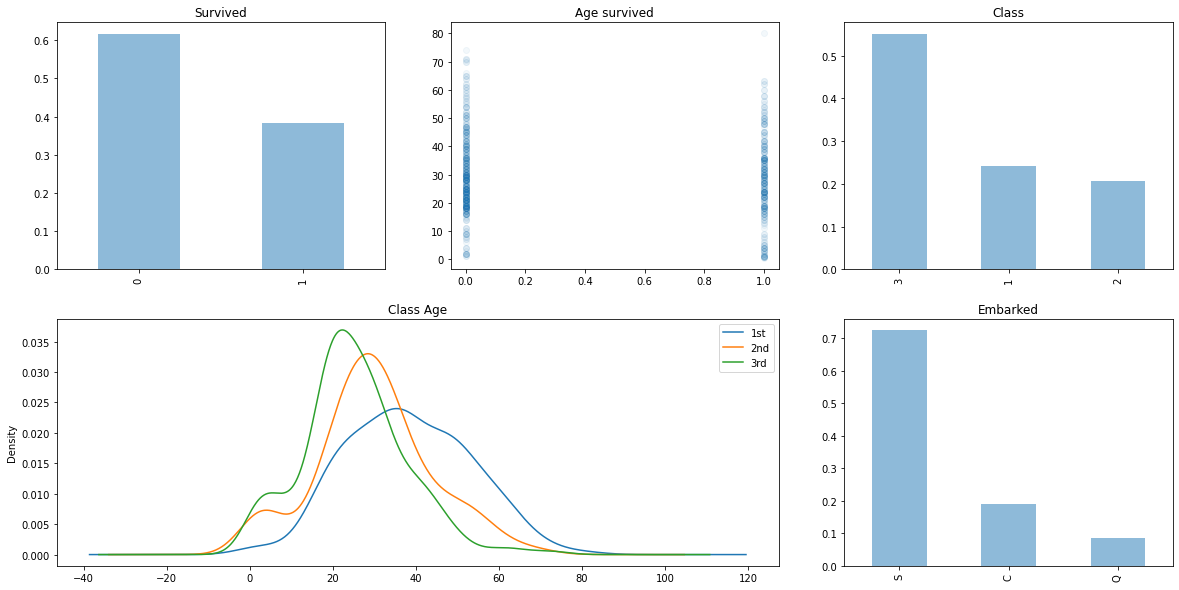

In [0]:
plt.figure(figsize=(20,10))
plt.subplot2grid((2,3),(0,0))
survived_ratio = train.Survived.value_counts(normalize=True)
survived_ratio.plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,3),(0,1))
plt.scatter(train.Survived, train.Age, alpha=0.05)
plt.title("Age survived")

plt.subplot2grid((2,3),(0,2))
train.Pclass.value_counts(normalize=True).plot(kind="bar",alpha =0.5)
plt.title("Class")

plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
  train.Age[train.Pclass == x].plot(kind="kde")
plt.title("Class Age")
plt.legend(('1st','2nd','3rd'))

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Embarked")

plt.show()

Text(0.5, 1.0, 'Female Survived')

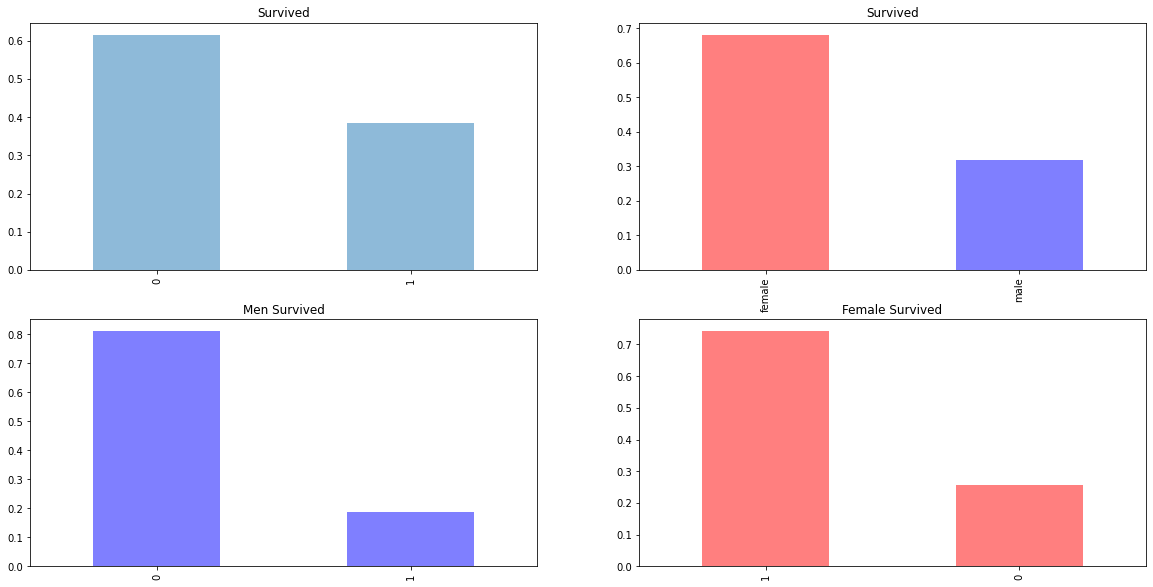

In [11]:
plt.figure(figsize=(20,10))
plt.subplot2grid((2,2),(0,0))
train.Survived.value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("Survived")

plt.subplot2grid((2,2),(0,1))
train.Sex[train.Survived==1].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color=['red','blue'])
plt.title("Survived")

plt.subplot2grid((2,2),(1,0))
train.Survived[train.Sex=='male'].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color='blue')
plt.title("Men Survived")

plt.subplot2grid((2,2),(1,1))
train.Survived[train.Sex=='female'].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color='red')
plt.title("Female Survived")


Text(0.5, 1.0, 'Poor women Survived')

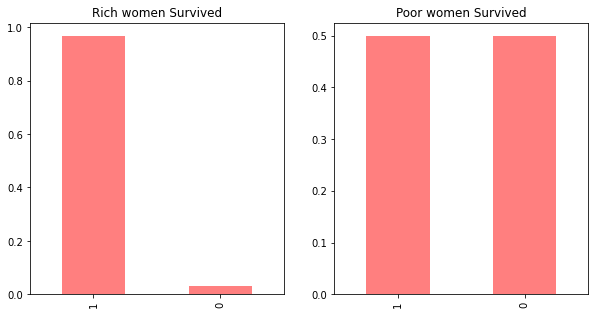

In [24]:
plt.figure(figsize=(10,5))
plt.subplot2grid((1,2),(0,0))
train.Survived[(train.Sex=='female') & (train.Pclass==1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color='red')
plt.title("Rich women Survived")

plt.subplot2grid((1,2),(0,1))
train.Survived[(train.Sex=='female') & (train.Pclass==3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5, color='red')
plt.title("Poor women Survived")



In [0]:
def clean_data(data):
  data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
  data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

  data.loc[data["Sex"] == "male", "Sex"] = 0
  data.loc[data["Sex"] == "female", "Sex"] = 1

  data["Embarked"] = data["Embarked"].fillna("S")
  data.loc[data["Embarked"] == "S", "Embarked"] = 0
  data.loc[data["Embarked"] == "C", "Embarked"] = 1
  data.loc[data["Embarked"] == "Q", "Embarked"] = 2

In [45]:
import pandas as pd
from sklearn import linear_model, preprocessing



train = pd.read_csv("train.csv")
clean_data(train)

target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "SibSp", "Parch"]].values

classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)

print(classifier_.score(features, target))

poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(features)
classifier_ = classifier.fit(poly_features, target)

print(classifier_.score(poly_features,target))






0.7912457912457912
0.8249158249158249


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
import pandas as pd
from sklearn import tree

train = pd.read_csv("train.csv")
clean_data(train)

target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "SibSp", "Parch"]].values

decision_tree = tree.decision_tree